# Comparing CIAA, DCFS and DLT
After downlading the three datasets from the conferences (CIAA-CIAA, DCFS-DCFS, DLT-DLT; without abstracts), we now show some fundamental statistics from every dataset and compare them to each other.
###### written by Nils Dyck, 04.11.2022

At first we import the three datasets using pandas.

In [2]:
#from data_science_project.config import ciaa_ciaa #do not know yet, why it is not working
import pandas as pd

sep_parameter = ';'
default = pd.read_csv('../data/cleaned/gruber-holzer-rauch_dataset.csv', sep=sep_parameter)
ciaa_ciaa = pd.read_csv('../data/cleaned/CIAA-CIAA.csv', sep=sep_parameter)
dcfs_dcfs = pd.read_csv('../data/cleaned/DCFS-DCFS.csv', sep=sep_parameter)
dlt_dlt = pd.read_csv('../data/cleaned/DLT-DLT.csv', sep=sep_parameter)

default.head()
# print(ciaa_ciaa.head())
#print(dcfs_dcfs.head())
# print(dlt_dlt.head())

,Venue,Year,Author,URL,CoAuthorList,Title,Pagination,NoAuthor,AuthorURLs,DOI
0,CIAA,2014,Florin Manea,https://dblp.org/pid/67/4899.html,"Marius Dumitran, Javier Gil, Florin Manea, Vic...",Bounded Prefix-Suffix Duplication.,176-187,4,"https://dblp.org/pid/147/8451.html,https://dbl...",10.1007/978-3-319-08846-4_13
1,CIAA,2016,Aleksandrs Belovs,https://dblp.org/pid/24/4309.html,"Aleksandrs Belovs, J. Andres Montoya, Abuzer Y...",Looking for Pairs that Hard to Separate: A Qua...,213-223,3,"https://dblp.org/pid/24/4309.html,https://dblp...",10.1007/978-3-319-40946-7_18
2,CIAA,2003,Tadeusz Dobosz,https://dblp.org/pid/53/947.html,"Olgierd Unold, Maciej Troc, Tadeusz Dobosz, Al...",Finite-State Molecular Computing.,309-310,4,"https://dblp.org/pid/15/3718.html,https://dblp...",10.1007/3-540-45089-0_33
3,CIAA,2005,Jason Eisner,https://dblp.org/pid/37/3263.html,"André Kempe, Jean-Marc Champarnaud, Jason Eisn...",A Class of Rational,188-198,5,"https://dblp.org/pid/04/692.html,https://dblp....",10.1007/11605157_16
4,CIAA,2012,Tullio Ceccherini-Silberstein,https://dblp.org/pid/47/5900.html,"Tullio Ceccherini-Silberstein, Michel Coornaer...",Cellular Automata on Regular Rooted Trees.,101-112,4,"https://dblp.org/pid/41/6022.html,https://dblp...",10.1007/978-3-642-31606-7_9


Now we collect the amount of paper and the number of publishing authors from each conference.

In [6]:
#count papers
ciaa_titles = ciaa_ciaa['Title'].to_list()
dcfs_titles = dcfs_dcfs['Title'].to_list()
dlt_titles = dlt_dlt['Title'].to_list()
default_titles = default['Title'].to_list()

ciaa_titles = set(ciaa_titles)
dcfs_titles = set(dcfs_titles)
dlt_titles = set(dlt_titles)
default_titles = set(default_titles)

#count authors
ciaa_authors = ciaa_ciaa['Author'].to_list()
dcfs_authors = dcfs_dcfs['Author'].to_list()
dlt_authors = dlt_dlt['Author'].to_list()

ciaa_authors = set(ciaa_authors)
dcfs_authors = set(dcfs_authors)
dlt_authors = set(dlt_authors)

#print results
print('CIAA has '+str(len(ciaa_titles))+' papers and '+str(len(ciaa_authors))+' authors.\n')
print('DCFS has '+str(len(dcfs_titles))+' papers and '+str(len(dcfs_authors))+' authors.\n')
print('DLT has '+str(len(dlt_titles))+' papers and '+str(len(dlt_authors))+' authors.\n')
print('Default has '+str(len(default_titles))+' papers.')

CIAA has 496 papers and 662 authors.

DCFS has 481 papers and 435 authors.

DLT has 963 papers and 986 authors.

Default has 687 papers.


Let us now see how many authors there are per paper.

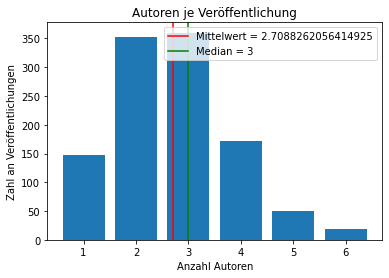

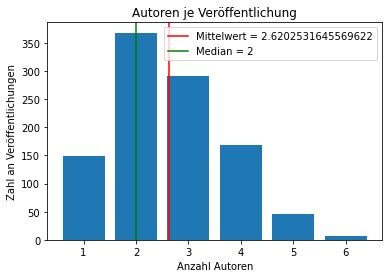

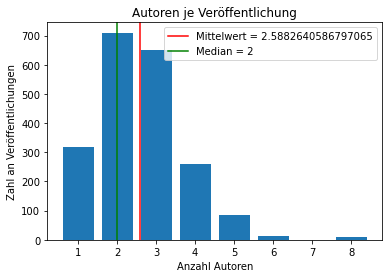

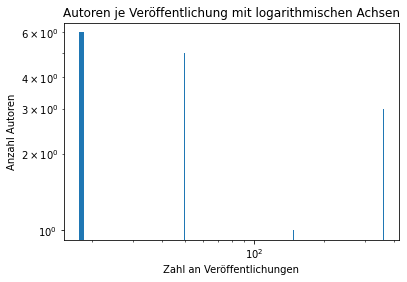

In [42]:
#At first clean the co-authors for easier use

import statistics

ciaa_co_authors = ciaa_ciaa['Co-Authors'].tolist()
for i in range(len(ciaa_co_authors)):
    ciaa_co_authors[i] = str(ciaa_co_authors[i]).split(', ')
for i in range(len(ciaa_co_authors)):
    for j in range(len(ciaa_co_authors[i])):
        ciaa_co_authors[i][j] = ciaa_co_authors[i][j].replace('nan', '')
dcfs_co_authors = dcfs_dcfs['Co-Authors'].tolist()
for i in range(len(dcfs_co_authors)):
    dcfs_co_authors[i] = str(dcfs_co_authors[i]).split(', ')
for i in range(len(dcfs_co_authors)):
    for j in range(len(dcfs_co_authors[i])):
        dcfs_co_authors[i][j] = dcfs_co_authors[i][j].replace('nan', '')
dlt_co_authors = dlt_dlt['Co-Authors'].tolist()
for i in range(len(dlt_co_authors)):
    dlt_co_authors[i] = str(dlt_co_authors[i]).split(', ')
for i in range(len(dlt_co_authors)):
    for j in range(len(dlt_co_authors[i])):
        dlt_co_authors[i][j] = dlt_co_authors[i][j].replace('nan', '')
ciaa_co_authors

#count the co-authors
ciaa_sum = []
for entry in ciaa_co_authors:
    if entry == ['']:
        ciaa_sum.append(1)
    else:
        #entry = entry.split(', ')
        ciaa_sum.append(len(entry)+1)
ciaa_avg = sum(ciaa_sum)/len(ciaa_sum)
ciaa_med = statistics.median(ciaa_sum)
dcfs_sum = []
for entry in dcfs_co_authors:
    if entry == ['']:
        dcfs_sum.append(1)
    else:
        #entry = entry.split(', ')
        dcfs_sum.append(len(entry)+1)
dcfs_avg = sum(dcfs_sum)/len(dcfs_sum)
dcfs_med = statistics.median(dcfs_sum)
dlt_sum = []
for entry in dlt_co_authors:
    if entry == ['']:
        dlt_sum.append(1)
    else:
        #entry = entry.split(', ')
        dlt_sum.append(len(entry)+1)
dlt_avg = sum(dlt_sum)/len(dlt_sum)
dlt_med = statistics.median(dlt_sum)

#count the number of co-authors
ciaa_plot = []
for i in range(1,max(ciaa_sum)+1):
    ciaa_plot.append(ciaa_sum.count(i))
dcfs_plot = []
for i in range(1,max(dcfs_sum)+1):
    dcfs_plot.append(dcfs_sum.count(i))
dlt_plot = []
for i in range(1,max(dlt_sum)+1):
    dlt_plot.append(dlt_sum.count(i))

#make a plot for each conference
import matplotlib.pyplot as plt

def makePlot(list, avg, med):
    x = []
    for i in range(1,len(list)+1):
        x.append(i)
    y = []
    for j in list:
        y.append(j)
    plt.bar(x, y)
    plt.title('Autoren je Veröffentlichung')
    plt.ylabel('Zahl an Veröffentlichungen')
    plt.xlabel('Anzahl Autoren')
    plt.axvline(avg, color = 'red', label = 'Mittelwert = '+str(avg))
    plt.axvline(med, color = 'green', label = 'Median = '+str(med))
    plt.legend()
    plt.show()

def makeLogPlot(list):
    x = []
    for i in range(1,len(list)+1):
        x.append(i)
    y = []
    for j in list:
        y.append(j)
    plt.bar(y, x)
    plt.title('Autoren je Veröffentlichung mit logarithmischen Achsen')
    plt.xlabel('Zahl an Veröffentlichungen')
    plt.ylabel('Anzahl Autoren')
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

makePlot(ciaa_plot, ciaa_avg, ciaa_med)
makePlot(dcfs_plot, dcfs_avg, dcfs_med)
makePlot(dlt_plot, dlt_avg, dlt_med)